# Workshop Task - Training models and preprocessing


We have a binary classification problem where we have to predict whether a credit should be approved or not for a new client of a bank.


|Field Name|	Order|	Type (Format)|Description|
| -------| -------|-----------|---------|
|checking_status|	1|	string (default)|Status of existing checking account, in Deutsche Mark.|	
|duration	|2|	number (default)	|Duration in months|
|credit_history	|3|	string (default)	|Credit history (credits taken, paid back duly, delays, critical accounts)|
|purpose	|4|	string (default)	|Purpose of the credit (car, television,…)|
|credit_amount	|5|	number (default)	|Credit amount|
|savings_status	|6|	string (default)	|Status of savings account/bonds, in Deutsche Mark.|
|employment	|7|	string (default)	|Present employment, in number of years.|
|installment_commitment	|8|	number (default)|Installment rate in percentage of disposable income|	
|personal_status	|9|	string (default)|Personal status (married, single,…) and sex|
|other_parties	|10|	string (default)|Other debtors / guarantors|	
|residence_since	|11|	number (default)|Present residence since X years|	
|property_magnitude	|12|	string (default)|Property (e.g. real estate)|	
|age	|13|	number (default)	|Age in years|
|other_payment_plans	|14|	string (default)|Other installment plans (banks, stores)|
|housing	|15|	string (default)	|Housing (rent, own,…)|
|existing_credits	|16|	number (default)|Number of existing credits at this bank|	
|job	|17|	string (default)	|Job|
|num_dependents	|18|	number (default)|Number of people being liable to provide maintenance for|	
|own_telephone	|19|	string (default)|Telephone (yes,no)|	
|foreign_worker	|20|	string (default)|Foreign worker (yes,no)|	
accepted	|21|	string (default)	|Class|


Your task is to : 
  1. Use some EDA techniques we learned the last 2 weeks
  2. Detect missing values
  4. From the seaborn package use the functions displot and boxplot to plot the distributions of the numerical variables. This should give you insight into what scaling type you should use. The boxplots will give a good indication on the presence of outliers.

  5. Scale the data.

  6. For the categorical features try different encodings e.g. target, label... 
    
  7. Make train/test split : with train(70%), test(30%) with random_state = 0

  8. Try to build quickly a few models, a Decision Tree, a Random Forest, a polynomial SVM, a Radial Basis SVM, KNN. Try to achieve performance of 80% + on test set. 
  
  9. Evaluate the model
    
  10. For reproducibility please use random_state on train_test_split and model initialization
  
  11. Write a summary :
    - Which model gives the best result?
    - What can we improve in the future?
    - BONUs: Which encoding give better performance on this dataset?

Bonus:
- Try building a model with only a subset of features. Try any of the feature selection techniques to find the 5 most important features according to each of the methods we learned in the previous week. Write a short summary of the results.
    



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
##read data set

df = pd.read_csv('dataset-workshop.csv')
df.head()


,Unnamed: 0,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,accepted
0,0,0_checking,6,Critical_acct_other_credits_existing,radio/television,3380.000000,Unknown_or_no_savings_acct,>7yrs,4,male_single,...,real_estate,NaN,none,own,2,skilled_employee/official,1,yes,yes,0
1,1,from_0_to_200,48,Existing_credits_paid_till_now,radio/television,6940.208336,<100DM,1_to_4yrs,2,female_divorced/separated/married,...,real_estate,22.0,none,own,1,skilled_employee/official,1,none,yes,1
2,2,None,12,Critical_acct_other_credits_existing,education,1902.370483,<100DM,4_to_7yrs,2,male_single,...,real_estate,49.0,none,own,1,unskilled_resident,2,none,yes,0
3,3,0_checking,42,Existing_credits_paid_till_now,furniture/equipment,1097.000000,<100DM,4_to_7yrs,2,male_single,...,building_society_savings_agreement/life_insurance,45.0,none,for_free,1,skilled_employee/official,2,none,yes,0
4,4,0_checking,24,Delay_in_past,new_car,9021.266894,<100DM,1_to_4yrs,3,male_single,...,unknown/no_property,53.0,none,for_free,2,skilled_employee/official,2,none,yes,1


In [4]:
df.isnull().sum()

Unnamed: 0                 0
checking_status            0
duration                   0
credit_history             0
purpose                    0
credit_amount              0
savings_status             0
employment                 0
installment_commitment     0
personal_status            0
other_parties              0
residence_since            0
property_magnitude         0
age                       50
other_payment_plans        0
housing                    0
existing_credits           0
job                        0
num_dependents             0
own_telephone              0
foreign_worker             0
accepted                   0
dtype: int64

In [5]:
df = df.drop(['Unnamed: 0','checking_status','duration','purpose','savings_status',
'personal_status','property_magnitude',
'other_payment_plans','job','own_telephone'], axis=1)

In [6]:
print(df['credit_history'].unique())



['Critical_acct_other_credits_existing' 'Existing_credits_paid_till_now'
 'Delay_in_past' 'None' 'No_credits_taken_or_all_paid'
 'All_credits_paid_duly']


In [7]:
df['credit_history'] =df['credit_history'].map({'Critical_acct_other_credits_existing':0,'Existing_credits_paid_till_now':1,
                          'Delay_in_past': 2,'None': 3,'No_credits_taken_or_all_paid':4,'All_credits_paid_duly':5})

In [8]:
df.head()

,credit_history,credit_amount,employment,installment_commitment,other_parties,residence_since,age,housing,existing_credits,num_dependents,foreign_worker,accepted
0,0,3380.000000,>7yrs,4,None,4,NaN,own,2,1,yes,0
1,1,6940.208336,1_to_4yrs,2,None,2,22.0,own,1,1,yes,1
2,0,1902.370483,4_to_7yrs,2,None,3,49.0,own,1,2,yes,0
3,1,1097.000000,4_to_7yrs,2,guarantor,4,45.0,for_free,1,2,yes,0
4,2,9021.266894,1_to_4yrs,3,None,4,53.0,for_free,2,2,yes,1


In [9]:
df['employment'] =df['employment'].map({'>7yrs':0,'1_to_4yrs':1,'4_to_7yrs':2,'unemployed':3,'<1yr':4})

In [10]:
df['other_parties'] = df['other_parties'].map({'None':0, 'guarantor':1,'co-applicant':2})

In [11]:
df['housing'] = df['housing'].map({'own': 0, 'for_free': 1, 'rent':2})

In [12]:
print(df['foreign_worker'].unique())

['yes' 'no']


In [13]:
df['foreign_worker'] = df['foreign_worker'].map({'yes': 0, 'no': 1})

In [14]:
df.head()

,credit_history,credit_amount,employment,installment_commitment,other_parties,residence_since,age,housing,existing_credits,num_dependents,foreign_worker,accepted
0,0,3380.000000,0,4,0,4,NaN,0,2,1,0,0
1,1,6940.208336,1,2,0,2,22.0,0,1,1,0,1
2,0,1902.370483,2,2,0,3,49.0,0,1,2,0,0
3,1,1097.000000,2,2,1,4,45.0,1,1,2,0,0
4,2,9021.266894,1,3,0,4,53.0,1,2,2,0,1


In [15]:
zero_not_accepted = ['age']
for column in zero_not_accepted:
    df[column] = df[column].replace(0,np.NaN)
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.NaN,mean)

In [16]:
df.head()

,credit_history,credit_amount,employment,installment_commitment,other_parties,residence_since,age,housing,existing_credits,num_dependents,foreign_worker,accepted
0,0,3380.000000,0,4,0,4,35.0,0,2,1,0,0
1,1,6940.208336,1,2,0,2,22.0,0,1,1,0,1
2,0,1902.370483,2,2,0,3,49.0,0,1,2,0,0
3,1,1097.000000,2,2,1,4,45.0,1,1,2,0,0
4,2,9021.266894,1,3,0,4,53.0,1,2,2,0,1


In [17]:
df.dtypes

credit_history              int64
credit_amount             float64
employment                  int64
installment_commitment      int64
other_parties               int64
residence_since             int64
age                       float64
housing                     int64
existing_credits            int64
num_dependents              int64
foreign_worker              int64
accepted                    int64
dtype: object

In [18]:
#convert to int
cols = ['credit_amount','age']
for col in cols:
   df[col] = df[col].apply(lambda x: int(x) if x == x else 0)

In [19]:
df.dtypes

credit_history            int64
credit_amount             int64
employment                int64
installment_commitment    int64
other_parties             int64
residence_since           int64
age                       int64
housing                   int64
existing_credits          int64
num_dependents            int64
foreign_worker            int64
accepted                  int64
dtype: object

In [20]:
train_df, test_df = train_test_split(df,test_size=0.2)

In [21]:
print(train_df.shape)
print(test_df.shape)

(802, 12)
(201, 12)


In [22]:
print(train_df.describe())
print(test_df.describe())

       credit_history  credit_amount  employment  installment_commitment  \
count      802.000000     802.000000  802.000000              802.000000   
mean         1.236908    4531.660848    1.567332                2.963840   
std          1.313042    3722.596020    1.392357                1.110584   
min          0.000000     505.000000    0.000000                1.000000   
25%          0.000000    1921.250000    0.000000                2.000000   
50%          1.000000    3706.500000    1.000000                3.000000   
75%          1.000000    5885.250000    2.000000                4.000000   
max          5.000000   27389.000000    4.000000                4.000000   

       other_parties  residence_since         age     housing  \
count     802.000000       802.000000  802.000000  802.000000   
mean        0.137157         2.854115   35.448878    0.460100   
std         0.453744         1.093581   10.932457    0.775099   
min         0.000000         1.000000   19.000000    0.

In [23]:
print(train_df.isna().any())
print(test_df.isna().any())

credit_history            False
credit_amount             False
employment                False
installment_commitment    False
other_parties             False
residence_since           False
age                       False
housing                   False
existing_credits          False
num_dependents            False
foreign_worker            False
accepted                  False
dtype: bool
credit_history            False
credit_amount             False
employment                False
installment_commitment    False
other_parties             False
residence_since           False
age                       False
housing                   False
existing_credits          False
num_dependents            False
foreign_worker            False
accepted                  False
dtype: bool


In [24]:
df.head()

,credit_history,credit_amount,employment,installment_commitment,other_parties,residence_since,age,housing,existing_credits,num_dependents,foreign_worker,accepted
0,0,3380,0,4,0,4,35,0,2,1,0,0
1,1,6940,1,2,0,2,22,0,1,1,0,1
2,0,1902,2,2,0,3,49,0,1,2,0,0
3,1,1097,2,2,1,4,45,1,1,2,0,0
4,2,9021,1,3,0,4,53,1,2,2,0,1


In [25]:
#### Choosing feature columns and target columns for Supervised Learning

X_train = train_df.drop(columns=['accepted'])
y_train = train_df['accepted'] 

X_test = test_df.drop(columns=['accepted'])
y_test = test_df['accepted']

#X = df.iloc[:,0:10]
#y = df.iloc[:,10]

X_train, X_test,y_train, y_test = train_test_split(X_train,y_train, random_state=0, test_size=0.3, train_size=0.7)

mms = StandardScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.fit_transform(X_test) 

In [26]:
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 389, 1: 172})
Counter({0: 170, 1: 71})


In [27]:
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

assert X_train.shape[1] == X_test.shape[1]
assert type(y_train) == type(y_test)

In [28]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (561, 11)
y_train: (561,)
X_test: (241, 11)
y_test: (241,)


In [29]:
##building models
model_list = list()
for md in (1, 3, 5, 7, 9, None):
    for crit in ('gini', 'entropy'):
        model_list.append(DecisionTreeClassifier(max_depth=md, criterion=crit))
    
for k in (1, 3, 5, 7, 9):
    model_list.append(KNeighborsClassifier(n_neighbors=k))
    
print(model_list)
print(len(model_list))

[DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(criterion='entropy', max_depth=1), DecisionTreeClassifier(max_depth=3), DecisionTreeClassifier(criterion='entropy', max_depth=3), DecisionTreeClassifier(max_depth=5), DecisionTreeClassifier(criterion='entropy', max_depth=5), DecisionTreeClassifier(max_depth=7), DecisionTreeClassifier(criterion='entropy', max_depth=7), DecisionTreeClassifier(max_depth=9), DecisionTreeClassifier(criterion='entropy', max_depth=9), DecisionTreeClassifier(), DecisionTreeClassifier(criterion='entropy'), KNeighborsClassifier(n_neighbors=1), KNeighborsClassifier(n_neighbors=3), KNeighborsClassifier(), KNeighborsClassifier(n_neighbors=7), KNeighborsClassifier(n_neighbors=9)]
17


In [30]:
eval_dict = dict()
for model in model_list:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    eval_dict[str(model)] = f1_score(y_test, y_pred, average='macro')
pd.DataFrame.from_dict(eval_dict, orient='index', columns=['f1']).sort_values(by='f1', ascending=False)

,f1
DecisionTreeClassifier(max_depth=1),0.965476
"DecisionTreeClassifier(criterion='entropy', max_depth=1)",0.965476
DecisionTreeClassifier(max_depth=3),0.960698
"DecisionTreeClassifier(criterion='entropy', max_depth=3)",0.960698
"DecisionTreeClassifier(criterion='entropy', max_depth=5)",0.955612
DecisionTreeClassifier(max_depth=5),0.926592
"DecisionTreeClassifier(criterion='entropy', max_depth=7)",0.916157
DecisionTreeClassifier(criterion='entropy'),0.903958
"DecisionTreeClassifier(criterion='entropy', max_depth=9)",0.903958
DecisionTreeClassifier(max_depth=7),0.891067


In [31]:
best_model = KNeighborsClassifier(n_neighbors=5) 
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [32]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,158,12
1,28,43


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       170
           1       0.78      0.61      0.68        71

    accuracy                           0.83       241
   macro avg       0.82      0.77      0.79       241
weighted avg       0.83      0.83      0.83       241



In [34]:
print('F1_score for micro is:',f1_score(y_test, y_pred, average='micro'))
print('F1_score for macro is:',f1_score(y_test, y_pred, average='macro'))
print('F1_score for weighted is:',f1_score(y_test, y_pred, average='weighted'))

F1_score for micro is: 0.8340248962655602
F1_score for macro is: 0.7850900659889424
F1_score for weighted is: 0.8272165720531612


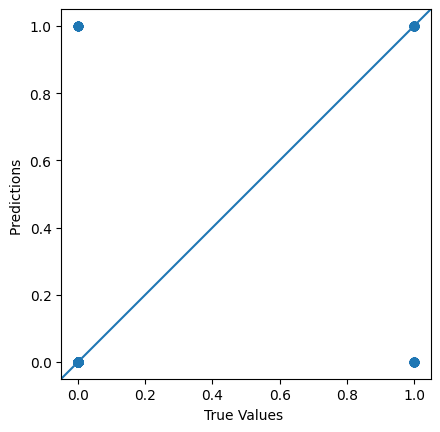

In [35]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.axis('equal')
plt.axis('square')
plt.plot([-100, 100], [-100, 100])

In [36]:
## Vasil Stamenkoski